In [120]:
import os
import json
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
import csv

In [121]:
# Pembacaan Parameter Dataset
filename = "parameter.json"
with open(filename, 'r') as f:
    params = json.load(f)

In [122]:
rr_target = []
hr_target = []
rr_phase = []
hr_phase = []
ext_rr_phase = []
ext_hr_phase = []

with open('./preprocessed_data/rr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_target.append(lines)
        
with open('./preprocessed_data/hr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_target.append(lines)
with open('./preprocessed_data/rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_phase.append(lines)
        
with open('./preprocessed_data/hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_phase.append(lines)
with open('./preprocessed_data/ext_rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_rr_phase.append(lines)
        
with open('./preprocessed_data/ext_hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_hr_phase.append(lines)

In [123]:
rr_target_array = []
hr_target_array = []
rr_phase_array = []
hr_phase_array = []
ext_rr_phase_array = []
ext_hr_phase_array = []
for i in range(0, 80, 2):
    rr_target_array.append(rr_target[i])
    hr_target_array.append(hr_target[i])
    rr_phase_array.append(rr_phase[i])
    hr_phase_array.append(hr_phase[i])
    ext_rr_phase_array.append(ext_rr_phase[i])
    ext_hr_phase_array.append(ext_hr_phase[i])
    
rr_target_array = np.array(rr_target_array).astype(np.float64)
hr_target_array = np.array(hr_target_array).astype(np.float64)
rr_phase_array = np.array(rr_phase_array).astype(np.float64)
hr_phase_array = np.array(hr_phase_array).astype(np.float64)
ext_rr_phase_array = np.array(ext_rr_phase_array).astype(np.float64)
ext_hr_phase_array = np.array(ext_hr_phase_array).astype(np.float64)

In [124]:
print(rr_phase_array.shape)
print(hr_phase_array.shape)
print(rr_target_array.shape)
print(hr_target_array.shape)
print(ext_rr_phase_array.shape)
print(ext_hr_phase_array.shape)

(40, 3000)
(40, 19500)
(40, 3000)
(40, 19500)
(40, 3000)
(40, 19500)


In [125]:
from scipy.signal import butter, filtfilt

def bandpass_filter(signal, lowcut=0.8, highcut=2.0, fs=130, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut/nyq, highcut/nyq], btype='band')
    return filtfilt(b, a, signal)

ecg_bpf = bandpass_filter(hr_target_array)
ecg_bpf.shape

(40, 19500)

In [126]:
from sklearn.preprocessing import PowerTransformer
from scipy import signal

hr_resampled_signal = []

for i in range(len(ecg_bpf)):
    pt = PowerTransformer()

    hr_norm = pt.fit_transform(ecg_bpf[i].reshape(-1, 1))

    hr_resampled = signal.resample(hr_norm, 19500)

    hr_resampled_signal.append(hr_resampled)
    
hr_target_array = np.array(hr_resampled_signal).squeeze()
hr_target_array.shape

(40, 19500)

In [127]:
hr_target_array.shape

(40, 19500)

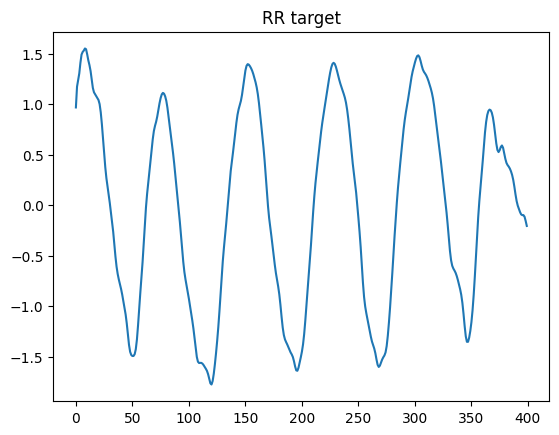

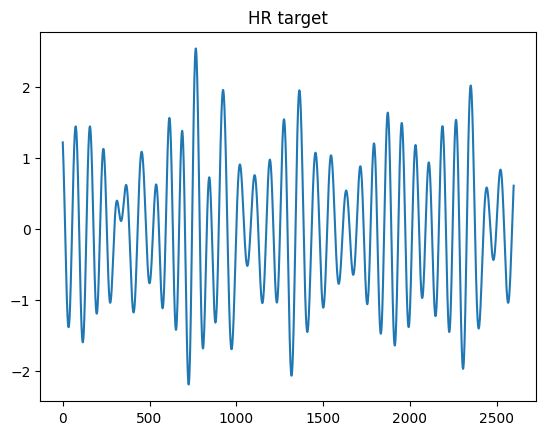

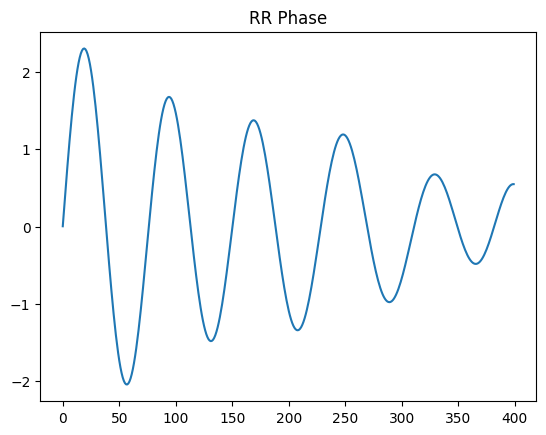

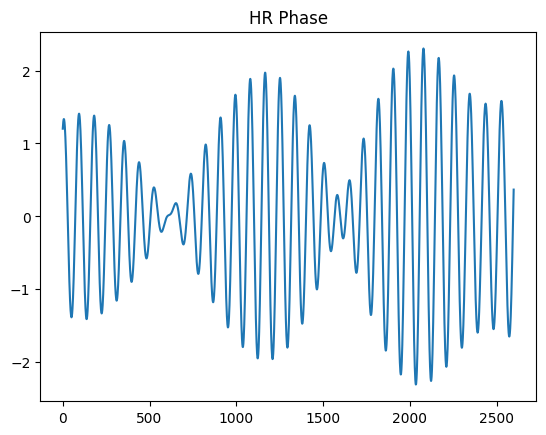

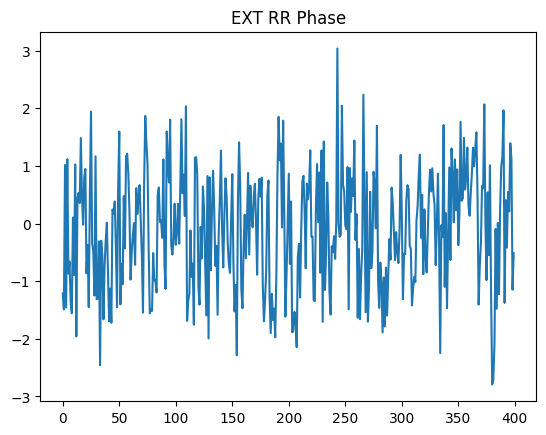

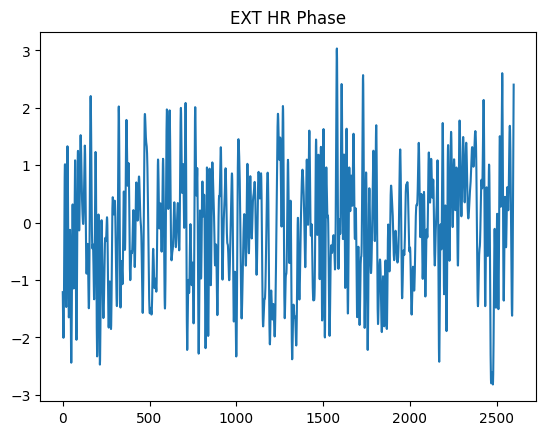

In [128]:
plt.figure(1)
plt.title("RR target")
plt.plot(rr_target_array[0][:400],label="RR target")
plt.figure(2)
plt.title("HR target")
plt.plot(hr_target_array[0][2600:5200],label="HR target")
plt.figure(3)
plt.title("RR Phase")
plt.plot(rr_phase_array[0][:400],label="RR Phase")
plt.figure(4)
plt.title("HR Phase")
plt.plot(hr_phase_array[0][2600:5200],label="HR Phase")
plt.figure(5)
plt.title("EXT RR Phase")
plt.plot(ext_rr_phase_array[0][:400],label="EXT RR Phase")
plt.figure(6)
plt.title("EXT HR Phase")
plt.plot(ext_hr_phase_array[0][:2600],label="EXT HR Phase")

In [129]:
def slide_win_rr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        for i in range(101):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 380
            index_2 = index_1 + 400
            vt_20s_1 = data[k][index_1:index_2]
        #print(index_1,index_2)
            isi_dataVT.append(vt_20s_1)

    return isi_dataVT

def slide_win_hr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        for i in range(101):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 2470
            index_2 = index_1 + 2600
            vt_20s_1 = data[k][index_1:index_2]
        #print(index_1,index_2)
            isi_dataVT.append(vt_20s_1)

    return isi_dataVT

In [130]:
rr_phase_array.shape

(40, 3000)

In [131]:
rr_phase_array

array([[ 0.00340183,  0.19593304,  0.38713094, ...,  0.02289163,
         0.01903891,  0.01512772],
       [ 0.60440468,  0.42519964,  0.24306679, ...,  0.01821242,
         0.01610863,  0.01668628],
       [ 1.91262663,  1.79109775,  1.65613086, ...,  0.01874091,
         0.01269698,  0.01501805],
       ...,
       [-0.21788778, -0.37672094, -0.53212447, ...,  0.01511676,
         0.01401007,  0.01229936],
       [ 0.30561267,  0.12779682, -0.05105671, ..., -0.00938551,
        -0.00854027, -0.00612514],
       [-0.48326116, -0.84867253, -1.20309678, ...,  0.01256804,
         0.01246708,  0.01079286]])

In [132]:
slide_rr_phase = np.array(slide_win_rr(rr_phase_array))
slide_hr_phase = np.array(slide_win_hr(hr_phase_array))
slide_rr_target = np.array(slide_win_rr(rr_target_array))
slide_hr_target = np.array(slide_win_hr(hr_target_array))
slide_ext_rr = np.array(slide_win_rr(ext_rr_phase_array))
slide_ext_hr = np.array(slide_win_hr(ext_hr_phase_array))

In [133]:
print(slide_rr_phase.shape, slide_rr_target.shape, slide_hr_phase.shape, slide_hr_target.shape, slide_ext_rr.shape, slide_ext_hr.shape)

(4040, 400) (4040, 400) (4040, 2600) (4040, 2600) (4040, 400) (4040, 2600)


In [134]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l1_l2
import keras_tuner


def build_model(hp):
    input_shape = (2600, 1)
    inputs = layers.Input(shape=input_shape)
    
    conv1 = layers.Conv1D(
        filters=hp.Int('conv1_filters', 8, 32, step=8),
        kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
        activation=hp.Choice('act1', ['relu', 'linear']), 
        padding='same')(inputs)
    conv1 = layers.BatchNormalization()(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2, padding='same')(conv1)
    
    conv2 = layers.Conv1D(
        filters=hp.Int('conv2_filters', 16, 64, step=16),
        kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
        activation=hp.Choice('act2', ['relu', 'linear']), 
        padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2, padding='same')(conv2)
    
    
    conv3 = layers.Conv1D(
        filters=hp.Int('conv3_filters', 32, 128, step=32),
        kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
        activation=hp.Choice('act3', ['relu', 'linear']), 
        padding='same')(pool2)
    conv3 = layers.BatchNormalization()(conv3)
    
    up4 = layers.Conv1DTranspose(filters=hp.Int('conv4T_filters', 16, 64, step=16),
                                 kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act4T', ['relu', 'linear']))(conv3)
    conv4 = layers.Conv1D(filters=hp.Int('conv4_filters', 16, 64, step=16),
                          kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]), 
                          activation=hp.Choice('act4', ['relu', 'linear']), 
                          padding='same')(up4)
    conv4 = layers.BatchNormalization()(conv4)

    up5 = layers.Conv1DTranspose(filters=hp.Int('conv5T_filters', 8, 32, step=8),
                                 kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act5T', ['relu', 'linear']))(conv4)
    conv5 = layers.Conv1D(filters=hp.Int('conv5_filters', 8, 32, step=8),
                          kernel_size=hp.Choice('kernel_size', [3, 5, 10, 20]), 
                          activation=hp.Choice('act5', ['relu', 'linear']), 
                          padding='same')(up5)
    conv5 = layers.BatchNormalization()(conv5)
    

    output = layers.Conv1D(1, 1, activation='linear')(conv5)

    model = Model(inputs, output)
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    model.compile(optimizer=RMSprop(learning_rate=lr), loss='mse') 
    return model


tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='tuning_hr_smoothing'
)

In [135]:
hr_train = slide_hr_phase[:3200]
hr_test = slide_hr_phase[3200:]
hr_target_train = slide_hr_target[:3200]
hr_target_test = slide_hr_target[3200:]

In [136]:
print(hr_train.shape)
print(hr_test.shape)
print(hr_target_train.shape)
print(hr_target_test.shape)

(3200, 2600)
(840, 2600)
(3200, 2600)
(840, 2600)


In [137]:
from tensorflow.keras.callbacks import EarlyStopping
tuner.search(hr_train[:2400], hr_target_train[:2400], epochs=50, validation_data=(hr_train[2400:], hr_target_train[2400:]))
best_model = tuner.get_best_models(num_models=50)
# best_model.summary()

Trial 6 Complete [00h 04m 05s]
val_loss: 0.9906647205352783

Best val_loss So Far: 0.9886214733123779
Total elapsed time: 00h 41m 19s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
32                |24                |conv1_filters
3                 |5                 |kernel_size
linear            |relu              |act1
48                |48                |conv2_filters
linear            |relu              |act2
128               |96                |conv3_filters
relu              |linear            |act3
48                |48                |conv4T_filters
relu              |linear            |act4T
48                |16                |conv4_filters
relu              |linear            |act4
32                |24                |conv5T_filters
relu              |relu              |act5T
32                |16                |conv5_filters
linear            |linear            |act5
0.00051051        |0.005189          |learning_rate

Epoch 1/50
75/

KeyboardInterrupt: 

In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[2]
# print(f"Best hyperparameters:")
# print(f" - Filters: {best_hps.get('filters')}")
# print(f" - Kernel Size: {best_hps.get('kernel_size')}")
# print(f" - Dilation Rates: {best_hps.get('dilation1')}, {best_hps.get('dilation2')}, {best_hps.get('dilation3')}, {best_hps.get('dilation4')}, {best_hps.get('dilation5')}")
# print(f" - Activation: {best_hps.get('activation1')}, {best_hps.get('activation2')}, {best_hps.get('activation3')}, {best_hps.get('activation4')}, {best_hps.get('activation5')}")
# print(f" - Learning Rate: {best_hps.get('learning_rate')}")

In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]
# best_model_ = tuner.hypermodel.build(best_hps)
# # === Train Best Model ===
# history = best_model_.fit(
#     hr_train, hr_target_train,
#     validation_split=0.2,
#     epochs=200,
#     batch_size=32,
#     verbose=1,
#     # callbacks=[
#     #     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     # ]
# )

In [ ]:
best_model[14].save("hr_model_tuner.h5")

In [ ]:
from tensorflow.keras.models import load_model

hr_predict = load_model("hr_model_tuner.h5", custom_objects={'mse': 'mean_squared_error'})

An1_HR = np.array(hr_predict(hr_test[0].reshape(1, -1, 1).astype(np.float64))[0,:,0])
An2_HR = np.array(hr_predict(hr_test[1].reshape(1, -1, 1).astype(np.float64))[0,:,0])
An3_HR = np.array(hr_predict(hr_test[2].reshape(1, -1, 1).astype(np.float64))[0,:,0])
An4_HR = np.array(hr_predict(hr_test[3].reshape(1, -1, 1).astype(np.float64))[0,:,0])

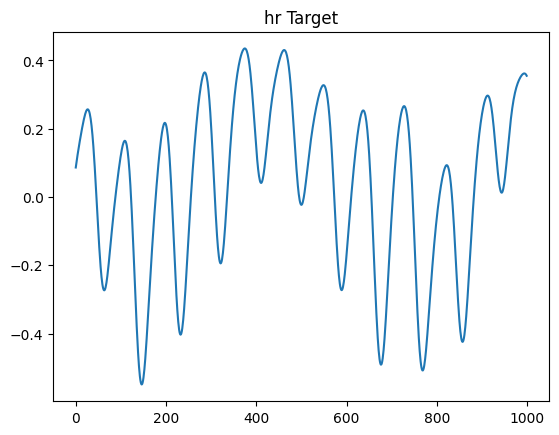

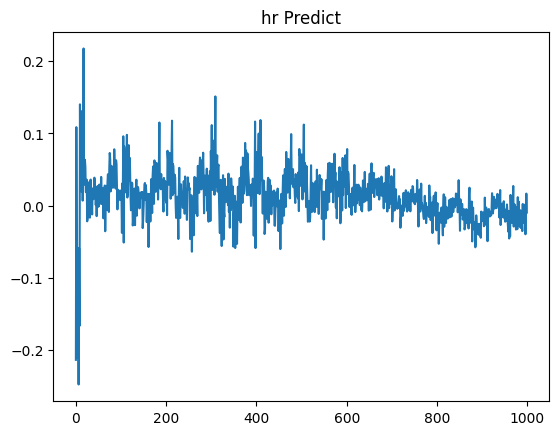

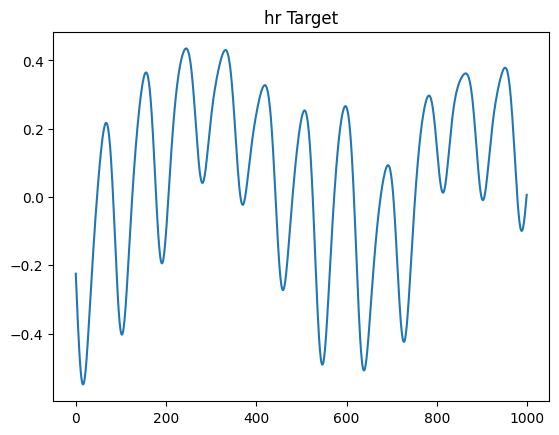

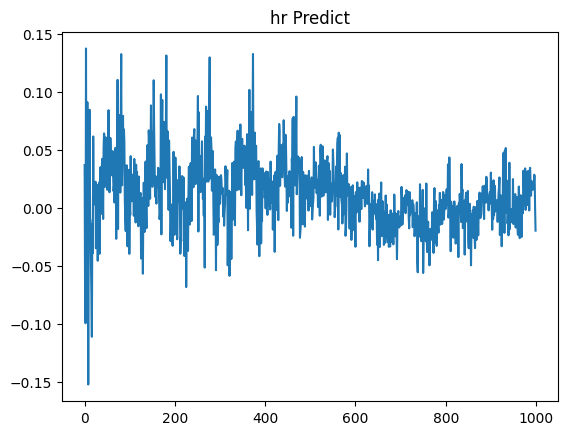

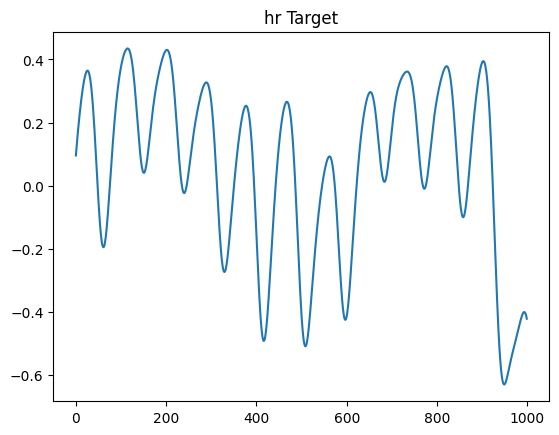

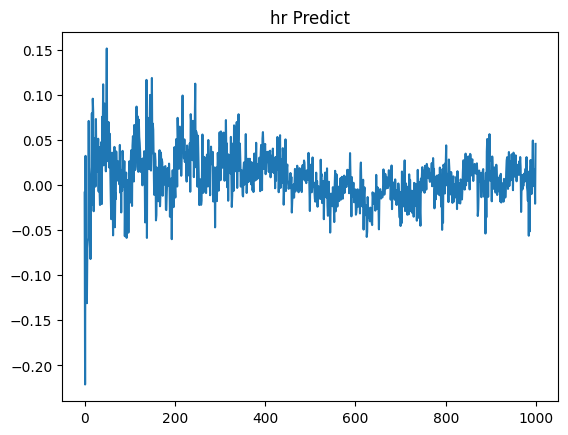

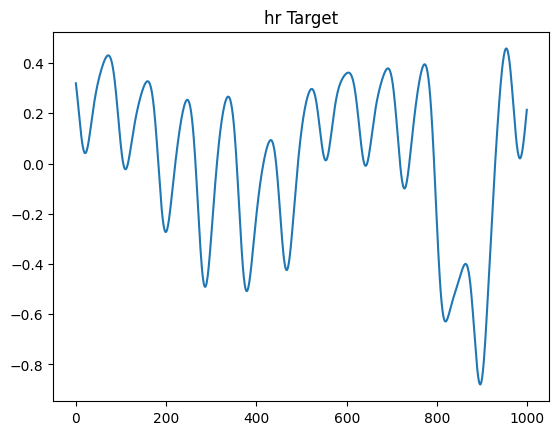

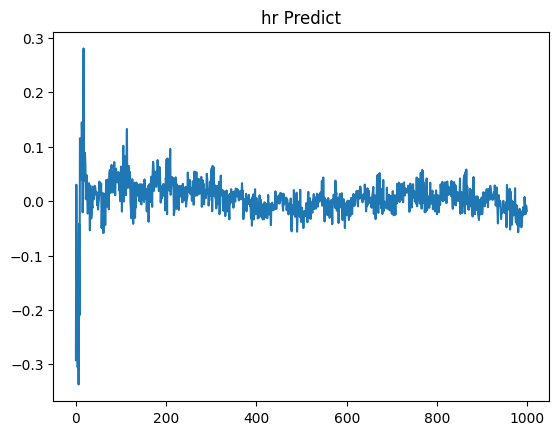

In [ ]:
plt.figure(1)
plt.title("hr Target")
plt.plot(hr_target_test[0][:1000],label="hr Target")
plt.figure(2)
plt.title("hr Predict")
plt.plot(An1_HR[:1000],label="hr Predict")
plt.figure(3)
plt.title("hr Target")
plt.plot(hr_target_test[1][:1000],label="hr Target")
plt.figure(4)
plt.title("hr Predict")
plt.plot(An2_HR[:1000],label="hr Predict")
plt.figure(5)
plt.title("hr Target")
plt.plot(hr_target_test[2][:1000],label="hr Target")
plt.figure(6)
plt.title("hr Predict")
plt.plot(An3_HR[:1000],label="hr Predict")
plt.figure(7)
plt.title("hr Target")
plt.plot(hr_target_test[3][:1000],label="hr Target")
plt.figure(8)
plt.title("hr Predict")
plt.plot(An4_HR[:1000],label="hr Predict")

In [ ]:
import math
from sklearn.metrics import mean_squared_error
def RMSE(actual, predicted):
    y_actual = actual
    y_predicted =predicted
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    RMSE = math.sqrt(MSE)
    return np.round(RMSE,2)

def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    m =np.mean(np.abs(y_true - predictions))
    return np.round(m,2)
def round_data(data):
    f = np.array([round(x) for x in data]).astype(int)
    return f 

In [ ]:
predicted = []

for i in range(len(hr_target_test)):
    y_pred = np.array(hr_predict(hr_target_test[i].reshape(1, -1, 1).astype(np.float64))[0,:,0])
    predicted.append(y_pred)
    
predicted = np.array(predicted)

In [ ]:
import numpy as np
import scipy.fftpack as fftpack
# Temporal bandpass filter with Fast-Fourier Transform
def fft_filter(data, freq_min, freq_max, fs):
    fft = fftpack.fft(data, axis=0)
    frequencies = fftpack.fftfreq(data.shape[0], d=1.0 / fs)
    bound_low = (np.abs(frequencies - freq_min)).argmin()
    bound_high = (np.abs(frequencies - freq_max)).argmin()
    fft[:bound_low] = 0
    fft[bound_high:-bound_high] = 0
    fft[-bound_low:] = 0
    iff = fftpack.ifft(fft, axis=0)
    result = np.abs(iff)
    result *= 100  # Amplification factor

    return result, fft, frequencies

from scipy import signal
# Calculate heart rate from FFT peaks
def find_heart_rate(fft, freqs, freq_min, freq_max):
    fft_maximums = []

    for i in range(fft.shape[0]):
        if freq_min <= freqs[i] <= freq_max:
            fftMap = abs(fft[i])
            fft_maximums.append(fftMap.max())
        else:
            fft_maximums.append(0)

    peaks, properties = signal.find_peaks(fft_maximums)
    max_peak = -1
    max_freq = 0

    # Find frequency with max amplitude in peaks
    for peak in peaks:
        if fft_maximums[peak] > max_freq:
            max_freq = fft_maximums[peak]
            max_peak = peak

    return freqs[max_peak] * 60

# Kalman 
def kalman_filter(z_ppg1):

    Q=20**2
    R=2**2

    count=0
    countmax=5
    imax=3

    xposteriori=z_ppg1[0]
    res = np.zeros(len(z_ppg1))
    res[0]=z_ppg1[0]
    Pposteriori=0
    hasil =[]

    for i in range (1, len(z_ppg1)):

        xpriori=xposteriori
        Ppriori=Pposteriori+Q

        S=Ppriori+R
        gain=Ppriori/S

        inn1=z_ppg1[i]-xpriori

        if (((count==countmax or i<imax) and ~np.isnan(inn1))):
            inn=inn1
            xposteriori=xpriori+gain*inn
            Pposteriori=(1-gain)*Ppriori
            if(count==countmax ):
                xposteriori=0.5*(z_ppg1[i]+xpriori)
            count=0

        else:
            count=count+1
            xposteriori=xpriori
            Pposteriori=Ppriori

        res[i]=xposteriori
        hasil.append(xposteriori)

    return hasil

def bpm_hr(data):
    hasil =[]
    for i in range(data.shape[0]):
        freq_min = 0.8
        freq_max = 2.0
        fs = 20
        result, fft, frequencies = fft_filter(data[i], freq_min, freq_max, fs)
        heart_rate = find_heart_rate(fft, frequencies, freq_min, freq_max)
        hasil.append(heart_rate)
    return hasil 

In [ ]:
hr_bpm = np.array(bpm_hr(predicted))
hr_ref_bpm = np.array(bpm_hr(hr_target_test))

In [ ]:
fileName ='./data_ta/raw/dero_semeter.bin'
ecg_dir = './data_ta/ecg/Polar_dero_semeter_ECG.txt'
hr_dir = './data_ta/hr/Polar_dero_semeter_HR.txt'
rr_dir = './data_ta/rr/dero-semeter.csv'

# Read Data Reference 
hr = pd.read_csv(hr_dir, delimiter=';')
ecg = pd.read_csv(ecg_dir, delimiter=';')
rr = pd.read_csv(rr_dir)

HR = np.array(hr.get("HR [bpm]"))
ECG = np.array(ecg.get("ecg [uV]"))
RR = np.array(rr.get("Data Set 1:Respiration Rate(bpm)"))
RR_WAVE = np.array(rr.get("Data Set 1:Force(N)"))
rr_cleaned = rr['Data Set 1:Respiration Rate(bpm)'].dropna()

In [ ]:
print(f"RMSE: {RMSE(hr_ref_bpm, hr_bpm)}")

RMSE: 8.59
